# Linear Stability Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

### Example:

**Comparing the stability of the logistic growth**

$$
    \dot N = rN\left(1 - \frac{N}{k}\right)
$$

In [3]:
def plot_logistic_growth(r, K, width=0.1, head_width=0.5, ax=None):
    """
    Plot the logistic growh of a system with
    an equilibrium of K < 100
    """
    ax = plt.subplot() if ax is None else ax
    N = np.linspace(0, 100, 200)
    log_growth = r * N * (1 - N / K)

    N_sample = np.arange(0, 100, 10)
    log_growth_sample = r * N_sample * (1 - N_sample / K)
    for Ni, growth in zip(N_sample, log_growth_sample):
        sign = np.sign(growth)
        if sign != 0:
            ax.arrow(Ni, 0, sign * 3, 0, width=width, color="tab:red", head_width=head_width)
        else:
            ax.scatter(Ni, 0, c="black", s=100)
            
    ax.plot(N, log_growth)
    ax.set_ylabel(r"$\dot N=rN\left(1 - \frac{N}{k}\right)$", fontsize=13)
    ax.set_xlabel(r"$N$", fontsize=13)
    ax.set_title(rf"Vector field with $r={r}$, $K={K}$", fontsize=15)
    

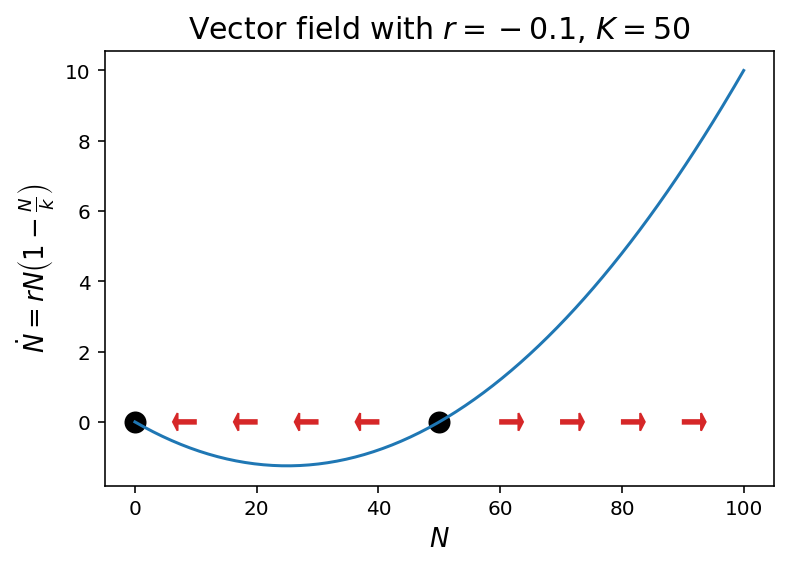

In [4]:
plot_logistic_growth(-0.1, 50)

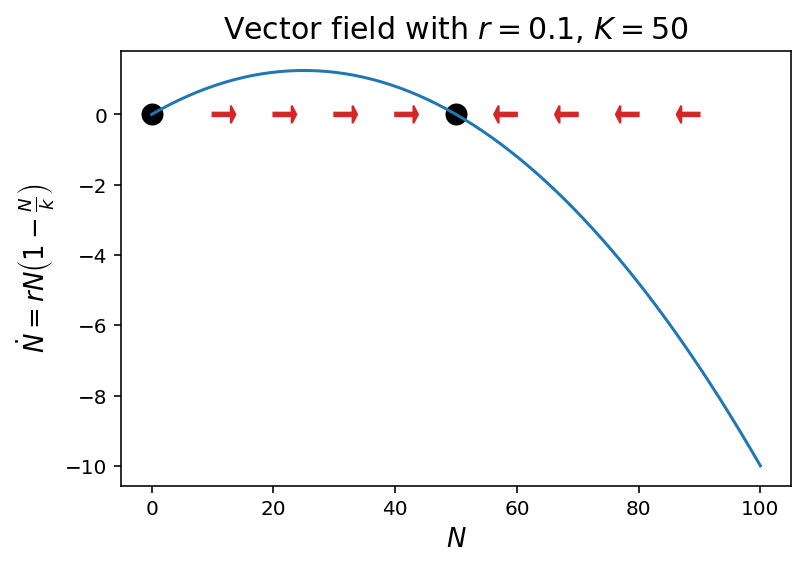

In [5]:
plot_logistic_growth(0.1, 50)

## Saddle nodes (an example)

$$
\dot x = x^2
$$

In [6]:
t = np.arange(-1, 2, 0.01)

def x(t, x0): return 1 / (1 / x0 - t) ** 2

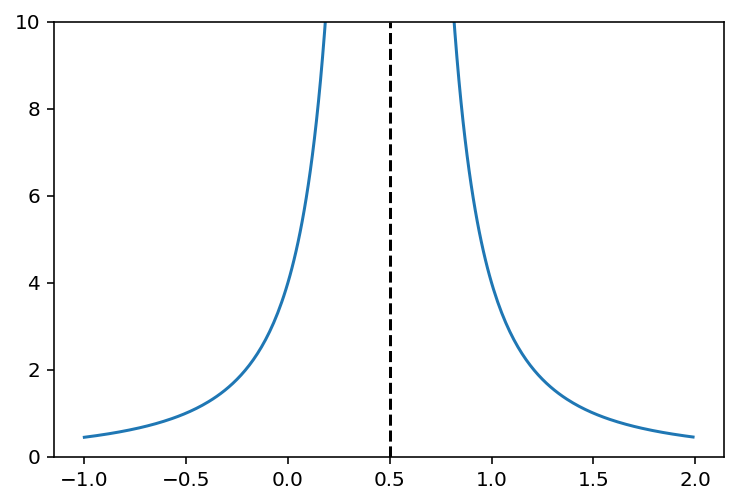

In [7]:
plt.plot(t, x(t, x0=2))
plt.ylim(0, 10)
plt.axvline(x=1/2, linestyle="--", c="black")

## A numerical example

$$
\begin{aligned}
\tilde x_{n+1} = x_n + f(x_n)\Delta t\\
x_{n+1} = x_n + \frac{1}{2}\left[f(x_n) + f(\tilde x_{n+1})\right]\Delta t
\end{aligned}
$$

In [8]:
def euler(f, x0, steps=100, dt=1e-4):
    xn = x0
    x_hist = np.zeros(steps)
    for s in range(steps):
        x_tilde = xn + f(xn) * dt
        x_next = xn + (f(xn) + f(x_tilde)) * dt / 2
        x_hist[s] = x_next
        xn = x_next
    
    return x_hist

In [9]:
def logistic_growth(N, r, k):
    return r * N * (1 - N / k)

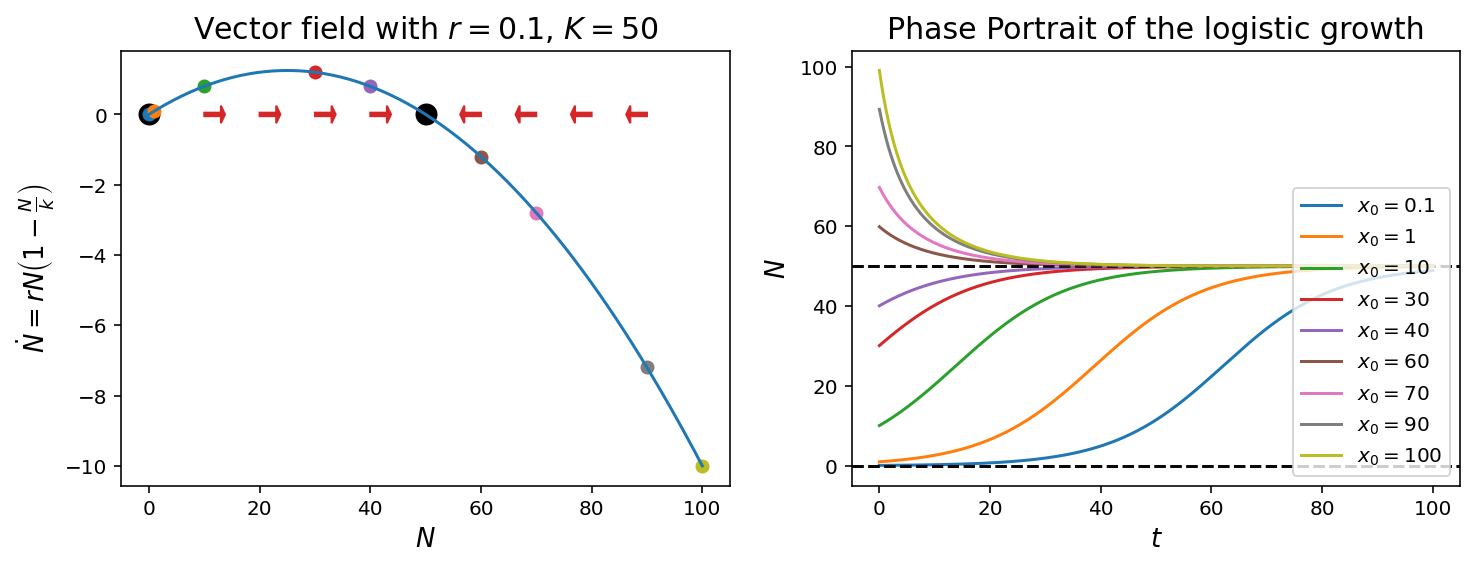

In [11]:
x0, k, n_steps, dt = 0.1, 50, 1000, 0.1
r = 0.1
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
t = np.linspace(0, dt * n_steps, n_steps)

plot_logistic_growth(r, 50, ax=ax[0])

initial_points = [0.1, 1, 10, 30, 40, 60, 70, 90, 100]
for x0 in initial_points:
    x1 = euler(lambda x: logistic_growth(x, r, k), x0, steps=n_steps, dt=dt)
    ax[1].axhline(y=k, c="black", linestyle="--", alpha=0.3)
    ax[1].axhline(y=0, c="black", linestyle="--", alpha=0.3)
    ax[1].plot(t, x1, label=rf"$x_0={x0}$")
    
    Nxo = logistic_growth(x0, r, k)
    ax[0].scatter(x0, Nxo)
    ax[1].set_ylabel("$N$", fontsize=13)
    ax[1].set_xlabel("$t$", fontsize=13)
ax[1].set_title("Phase Portrait of the logistic growth", fontsize=15)
ax[1].legend(loc="lower right");